## <span style="color: DeepPink; ">2.6.1 行列の和差積商</span>

In [1]:
import numpy as np

# ①3行3列の行列AとB 
A = np.array([[1, 2, 3], [4, 2, 3], [12, 3, 1]])
B = np.array([[1, 2, 1], [2, 3, 1], [5, 4, 1]])
print("行列Aは\n",A,'\n')
print("行列Bは\n",B,'\n')

# ②行列の転置
transA1=A.T
transA2=np.transpose(A)
print("Aの転置は\n",transA1,'\nおよび\n', transA2,"\n")

# ③行列の加算
sum_of_matrices = A + B
print("A+Bは\n",sum_of_matrices,'\n')

#④行列の積
product_of_matrices = np.dot(A, B)
print("A・Bは\n",product_of_matrices,'\n')

#⑤単位行列I
identity_matrix = np.eye(3)
print("単位行列は\n",identity_matrix ,'\n')

#⑥行列Aの逆行列
inverse_of_A = np.linalg.inv(A)
print("Aの逆行列は\n",inverse_of_A  ,'\n')

# ⑦行列Aとその逆行列の積
product_of_A_and_inverse = np.dot(A, inverse_of_A)
print("A・inv(A)は\n",np.around(product_of_A_and_inverse, decimals=0) ,'\n')

行列Aは
 [[ 1  2  3]
 [ 4  2  3]
 [12  3  1]] 

行列Bは
 [[1 2 1]
 [2 3 1]
 [5 4 1]] 

Aの転置は
 [[ 1  4 12]
 [ 2  2  3]
 [ 3  3  1]] 
および
 [[ 1  4 12]
 [ 2  2  3]
 [ 3  3  1]] 

A+Bは
 [[ 2  4  4]
 [ 6  5  4]
 [17  7  2]] 

A・Bは
 [[20 20  6]
 [23 26  9]
 [23 37 16]] 

単位行列は
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Aの逆行列は
 [[-3.33333333e-01  3.33333333e-01  3.70074342e-17]
 [ 1.52380952e+00 -1.66666667e+00  4.28571429e-01]
 [-5.71428571e-01  1.00000000e+00 -2.85714286e-01]] 

A・inv(A)は
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]] 



## <span style="color: DeepPink; ">2.6.2 行列で連立方程式を解く</span>

In [2]:
import numpy as np
A = np.array([[3, 2, 1], [4, 5, 6], [3, 2, 2]])
B =np.array([[1], [2], [3]])
inverse_of_A = np.linalg.inv(A)
print("解は\n",np.dot(inverse_of_A,B),"\nです")

解は
 [[ 2.14285714]
 [-3.71428571]
 [ 2.        ]] 
です


### <span style="color: blue; ">逆行列</span>

In [3]:
import numpy as np
A = np.array([[1, 1, 1], [2, 2, 2], [3, 2, 2]])
B =np.array([[1], [2], [3]])
print("rank：",np.linalg.matrix_rank(A))
inverse_of_A = np.linalg.inv(A)

rank： 2


LinAlgError: Singular matrix

### <span style="color: blue; ">最小二乗法</span>

回帰線傾き：①0.21, ②0.21, ③0.21
回帰線切片：①-0.03, ②-0.03, ③-0.03


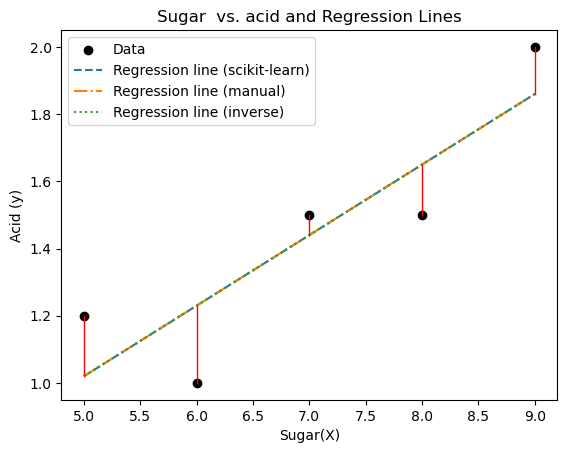

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# データの設定
X = np.array([5, 6, 7, 8, 9]).reshape(-1, 1)  # 糖度
y = np.array([1.2, 1, 1.5, 1.5, 2]).reshape(-1, 1)  # 酸度

# ①-1. 関数を用いる方法（scikit-learnのLinearRegression）
model = LinearRegression()
model.fit(X, y)
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_[0]

# ①-2. 偏微分方程式から導出される定義式から計算する方法
X_mean = np.mean(X)
y_mean = np.mean(y)
slope_manual = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
intercept_manual = y_mean - slope_manual * X_mean

# ①-3. 逆行列から計算する方法
X_b = np.c_[X,np.ones((X.shape[0], 1))]  # Xにバイアス項を追加
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept_inverse = theta_best[1]
slope_inverse = theta_best[0]

# ②回帰線の表示
print(f"回帰線傾き：①{slope_sklearn[0]:.2f}, ②{slope_manual:.2f}, ③{slope_inverse[0]:.2f}")
print(f"回帰線切片：①{intercept_sklearn[0]:.2f}, ②{intercept_manual:.2f}, ③{intercept_inverse[0]:.2f}")


# ③回帰線の計算
X_new = np.array([[X.min()], [X.max()]])
y_predict_sklearn = model.predict(X_new)
y_predict_manual = intercept_manual + slope_manual * X_new
y_predict_inverse = intercept_inverse + slope_inverse * X_new

# ④散布図と回帰線、回帰線からの誤差を示す図を作成
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_predict_sklearn, label='Regression line (scikit-learn)', linestyle='--')
plt.plot(X_new, y_predict_manual, label='Regression line (manual)', linestyle='-.')
plt.plot(X_new, y_predict_inverse, label='Regression line (inverse)', linestyle=':')

# ⑤各データ点についての誤差をプロット
for x, actual, predicted in zip(X, y, model.predict(X)):
    plt.plot([x, x], [actual, predicted], color='red', linestyle='-', linewidth=1)

plt.xlabel('Sugar(X)')
plt.ylabel('Acid (y)')
plt.title('Sugar  vs. acid and Regression Lines')
plt.legend()
plt.show()
